In [ ]:
import pandas as pd
import math
import numpy as np


df = pd.read_csv("output.csv", delimiter=",", index_col = None)

df['eager_prop_of_best_matches'] = df['eager_match_best']/df['number_of_tests']
df['dtree_prop_of_best_matches'] = df['dtree_match_best']/df['number_of_tests']
df

,n,number_of_tests,bf_avg_time,eager_avg_time,eager_avg_dist,dtree_avg_time,dtree_avg_dist,eager_match_best,dtree_match_best,eager_prop_of_best_matches,dtree_prop_of_best_matches
0,3,5,0.0012,0.0014,0.000000,0.0226,-0.004463,5,5,1.0,1.0
1,4,5,0.0030,0.0010,0.006529,0.0216,0.003416,3,4,0.6,0.8
2,5,5,0.0110,0.0012,0.076021,0.0258,0.055453,0,0,0.0,0.0
3,6,5,0.0658,0.0016,0.044757,0.0306,0.086029,3,2,0.6,0.4
4,7,5,0.4628,0.0016,0.054316,0.0340,0.151032,3,1,0.6,0.2
...,...,...,...,...,...,...,...,...,...,...,...
493,496,5,0.0000,0.6100,0.000000,10.2140,0.000000,0,0,0.0,0.0
494,497,5,0.0000,0.6124,0.000000,10.1700,0.000000,0,0,0.0,0.0
495,498,5,0.0000,0.6032,0.000000,10.2726,0.000000,0,0,0.0,0.0
496,499,5,0.0000,0.6080,0.000000,10.3644,0.000000,0,0,0.0,0.0


## Время выполнения элеметнарной операции

In [166]:
print("n\tсрденее время выполнения Точного алгоритма в наносекундах")
for i in df.index[df.index < 10]:
    print(df.iloc[i]['n'], round(df.iloc[i]['bf_avg_time']*1000000), sep='\t')


## данные из wolframalpha
numeric_n = pd.DataFrame([
    [9, 1.03506305918704],
    [10, 1.03002163303088],
    [11, 1.02713075326732],
    [12, 1.02447957149430]
], columns=["n", "time_ns"])

processor_time = numeric_n["time_ns"].mean()
print("Среднее процессорное время на выполнение ЭУС", numeric_n["time_ns"].mean())

n	срденее время выполнения Точного алгоритма в наносекундах
3.0	1200
4.0	3000
5.0	11000
6.0	65800
7.0	462800
8.0	2866600
9.0	14377400
10.0	154543600
11.0	1820249600
12.0	23320960800
Среднее процессорное время на выполнение ЭУС 1.029173754244885


## Графики зависиомсти времени работы от входных данных  

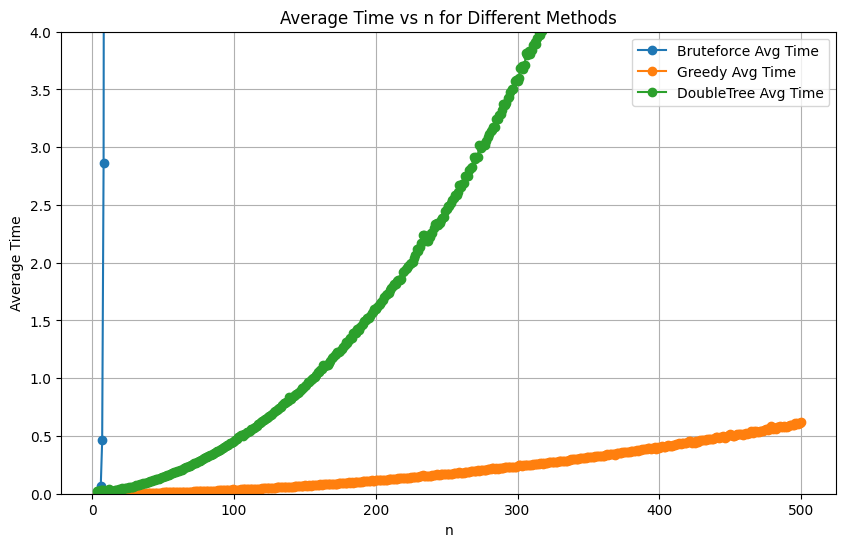

In [52]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'
plt.figure(figsize=(10, 6))

# Plot each avg_time column against n
plt.plot(df[df['n'] < 12]['n'], df[df['n'] < 12]['bf_avg_time'], label='Bruteforce Avg Time', marker='o')
plt.plot(df['n'], df['eager_avg_time'], label='Greedy Avg Time', marker='o')
plt.plot(df['n'], df['dtree_avg_time'], label='DoubleTree Avg Time', marker='o')

plt.ylim(0, 4)

# Add labels and title
plt.xlabel('n')
plt.ylabel('Average Time')
plt.title('Average Time vs n for Different Methods')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
from scipy.special import gamma

def T_bf(n):
    n = n*processor_time
    return (2*n*gamma(n)+10*gamma(n) + 4*n + 11)/100000

def T_eager(n):
    n = n*processor_time
    return (12+2*(n**2) + 170*n) / 1000000

def T_dtree(n):
    n = n*processor_time
    return (42*n**2+6*n+3) / 1000000


x_bf = np.linspace(3, 12, 100)
y_bf = T_bf(x_bf)

x_eager = np.linspace(3, 500, 100)
y_eager = T_eager(x_eager)

x_dtree = np.linspace(3, 500, 100)
y_dtree = T_dtree(x_dtree)

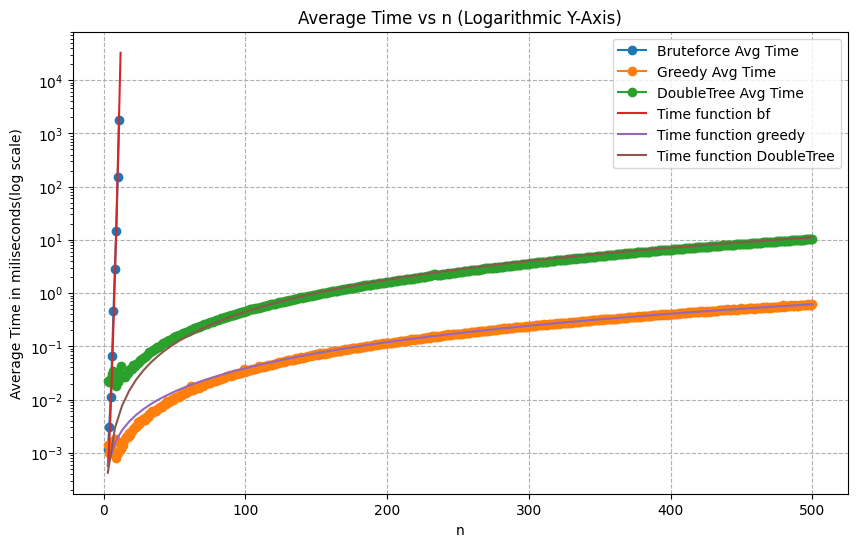

In [164]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'
plt.figure(figsize=(10, 6))

# Plot each avg_time column against n
plt.plot(df[df['n'] < 12]['n'], df[df['n'] < 12]['bf_avg_time'], label='Bruteforce Avg Time', marker='o')
plt.plot(df['n'], df['eager_avg_time'], label='Greedy Avg Time', marker='o')
plt.plot(df['n'], df['dtree_avg_time'], label='DoubleTree Avg Time', marker='o')

plt.plot(x_bf, y_bf, label='Time function bf')

plt.plot(x_eager, y_eager, label='Time function greedy')

plt.plot(x_dtree, y_dtree, label='Time function DoubleTree')
# Set logarithmic scale on y-axis
plt.yscale('log')

# Add labels and title
plt.xlabel('n')
plt.ylabel('Average Time in miliseconds(log scale)')
plt.title('Average Time vs n (Logarithmic Y-Axis)')
plt.legend()

# Display the plot
plt.grid(True, which="major", ls="--")  # Grid for both major and minor ticks
plt.show()

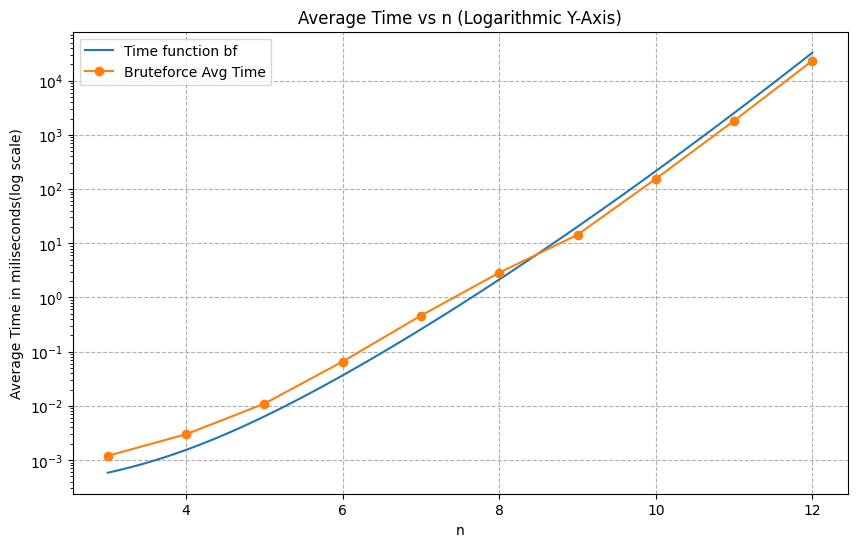

In [59]:

# Assuming your DataFrame is called 'df'
plt.figure(figsize=(10, 6))

plt.plot(x_bf, y_bf, label='Time function bf')

plt.plot(df[df['n'] < 13]['n'], df[df['n'] < 13]['bf_avg_time'], label='Bruteforce Avg Time', marker='o')

# Set logarithmic scale on y-axis
plt.yscale('log')

# Add labels and title
plt.xlabel('n')
plt.ylabel('Average Time in miliseconds(log scale)')
plt.title('Average Time vs n (Logarithmic Y-Axis)')
plt.legend()

# Display the plot
plt.grid(True, which="major", ls="--")  # Grid for both major and minor ticks
plt.show()

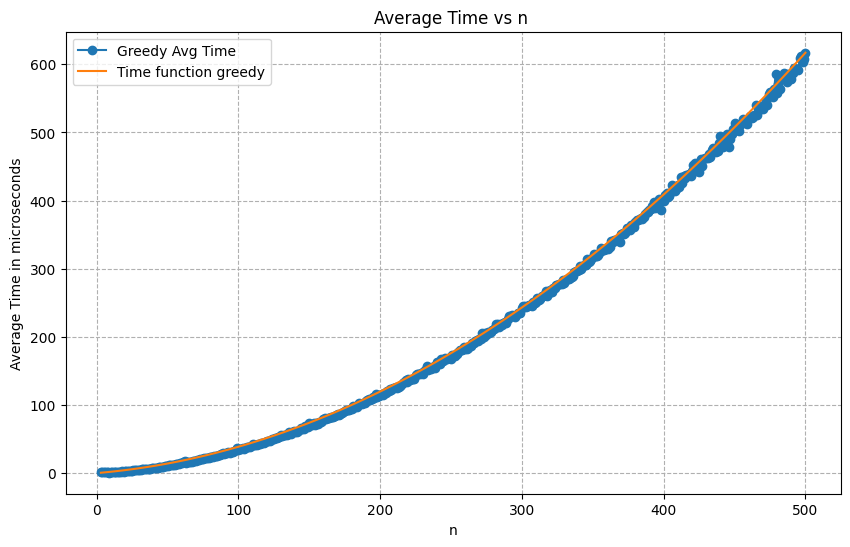

In [106]:

# Assuming your DataFrame is called 'df'
plt.figure(figsize=(10, 6))

plt.plot(df['n'], df['eager_avg_time']*1000, label='Greedy Avg Time', marker='o')

plt.plot(x_eager, y_eager*1000, label='Time function greedy')


# Add labels and title
plt.xlabel('n')
plt.ylabel('Average Time in microseconds')
plt.title('Average Time vs n ')
plt.legend()

# Display the plot
plt.grid(True, which="major", ls="--")  # Grid for both major and minor ticks
plt.show()

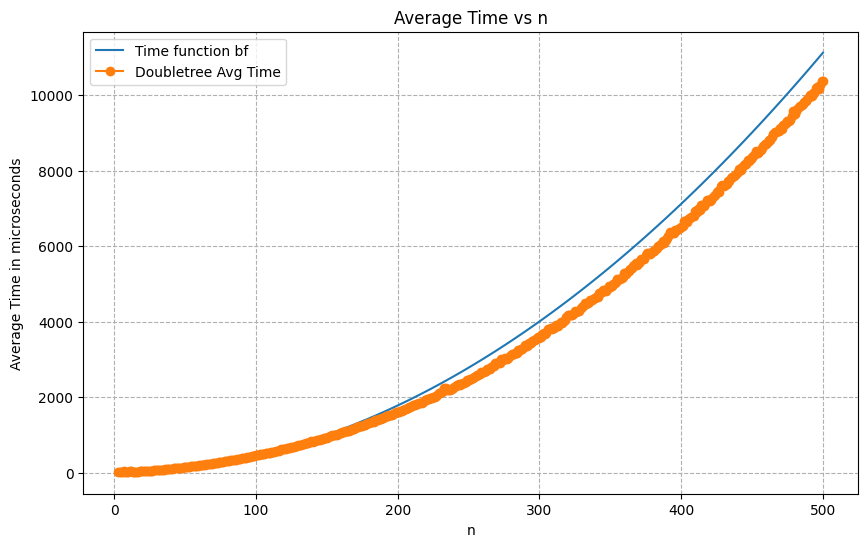

In [163]:

# Assuming your DataFrame is called 'df'
plt.figure(figsize=(10, 6))

plt.plot(x_dtree, y_dtree*1000, label='Time function bf')

plt.plot(df['n'], df['dtree_avg_time']*1000, label='Doubletree Avg Time', marker='o')

# Set logarithmic scale on y-axiss
# plt.yscale('log')

# Add labels and title
plt.xlabel('n')
plt.ylabel('Average Time in microseconds')
plt.title('Average Time vs n')
plt.legend()

# Display the plot
plt.grid(True, which="major", ls="--")  # Grid for both major and minor ticks
plt.show()